In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [155]:
data = pd.read_csv('winequality-red.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [156]:
data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [157]:
y = data['quality']
x = data.drop(['quality'], axis=1)


/Users/taozhang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


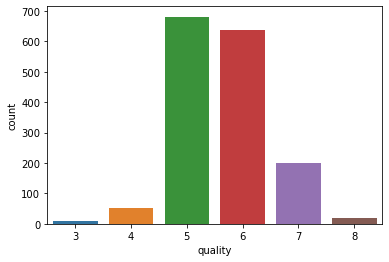

In [158]:
sns.countplot(y)
plt.show()

/Users/taozhang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


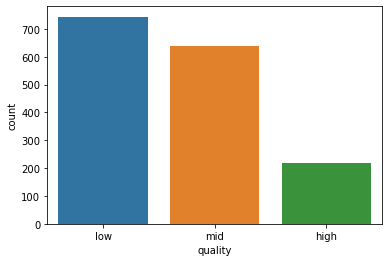

In [159]:
def encode(y):
    if y < 6:
        return 'low'
    elif y < 7:
        return 'mid'
    else:
        return 'high'
y = y.apply(encode)
sns.countplot(y)
plt.show()

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=33)

In [163]:
print(y_train.value_counts()/len(y_train))
print(y.value_counts()/len(y))

low     0.465207
mid     0.398749
high    0.136044
Name: quality, dtype: float64
low     0.465291
mid     0.398999
high    0.135710
Name: quality, dtype: float64


/Users/taozhang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


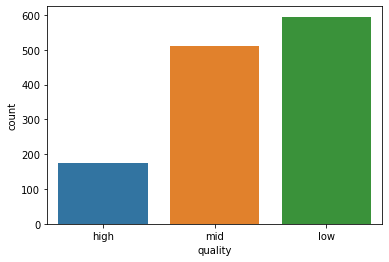

In [164]:
sns.countplot(y_train)
plt.show()

In [115]:
from sklearn.decomposition import PCA

z_scores = scipy.stats.zscore(x_train)
filtered_data = (np.abs(z_scores)<5).all(axis=1)
x_train0 = x_train[filtered_data]
y_train0 = y_train[filtered_data]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = x_train.columns
x_train0[columns] = scaler.fit_transform(x_train0[columns])
x_test0 = x_test.copy()
x_test0[columns] = scaler.transform(x_test[columns])


pca = PCA(n_components=round(0.7*x_train.shape[1]))
x_train0 = pd.DataFrame(pca.fit_transform(x_train0))
x_test0 = pd.DataFrame(pca.transform(x_test0))

<ipython-input-115-3c42306c39ab>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train0[columns] = scaler.fit_transform(x_train0[columns])
/Users/taozhang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/Users/taozhang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

In [116]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE(random_state=33)
x_train0_sm, y_train0_sm = smote.fit_sample(x_train0, y_train0)
y_train0_sm.value_counts()

mid     574
high    574
low     574
Name: quality, dtype: int64

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, classification_report, confusion_matrix

logReg = LogisticRegression(penalty='none')
logReg.fit(x_train0_sm, y_train0_sm)
y_predict = logReg.predict(x_test0)

print(accuracy_score(y_test, y_predict))

print(classification_report(y_true = y_test, y_pred = y_predict))

confusion_matrix(y_test, y_predict)

0.6125
              precision    recall  f1-score   support

        high       0.42      0.83      0.56        42
         low       0.72      0.70      0.71       150
         mid       0.62      0.44      0.51       128

    accuracy                           0.61       320
   macro avg       0.59      0.66      0.59       320
weighted avg       0.64      0.61      0.61       320



array([[ 35,   3,   4],
       [ 14, 105,  31],
       [ 34,  38,  56]])

In [47]:
data_train = x_train.join(y_train)
high_train = data_train[y_train == 'high']
mid_train = data_train[y_train == 'mid']
low_train = data_train[y_train == 'low']
# oversampling
from sklearn.utils import resample

high_sample = resample(high_train, replace=True, n_samples=len(mid_train)-len(high_train), random_state=33)
low_sample = resample(low_train, replace=True, n_samples=len(mid_train)-len(low_train), random_state=33)


In [23]:
data_sample = pd.concat([data_train, high_sample, low_sample], ignore_index=True)
data_sample['quality'].value_counts()

mid     1051
high    1051
low     1051
Name: quality, dtype: int64

In [165]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE(random_state=33)
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)
y_train_sm.value_counts()

mid     595
high    595
low     595
Name: quality, dtype: int64

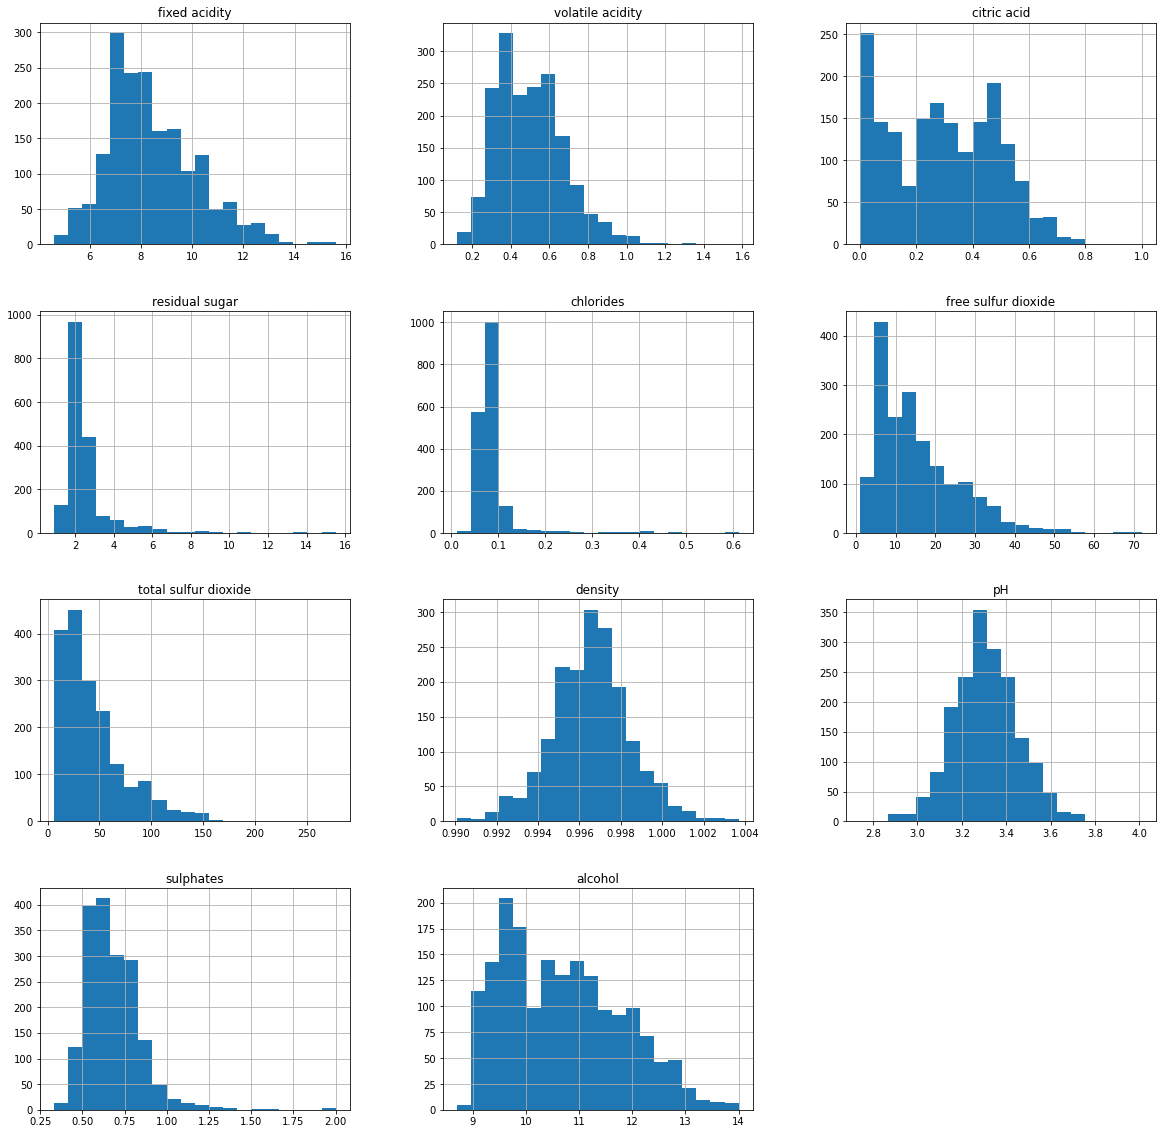

In [166]:
x_train_sm.hist(bins = 20, figsize = (20, 20))
plt.show()

In [167]:
# remove outliers
# x_train0 = x_train.copy()
# log_columns = ['households', 'population', 'total_rooms', 'total_bedrooms', 'median_income']
# x_train0[num_col] = x_train0[num_col].apply(np.log)
z_scores = scipy.stats.zscore(x_train_sm)
filtered_data = (np.abs(z_scores)<5).all(axis=1)
x_train_sm = x_train_sm[filtered_data]
y_train_sm = y_train_sm[filtered_data]
x_train_sm.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000
mean,8.415670,0.500332,0.288576,2.468588,0.080535,15.249031,42.653560,0.996533,3.314423,0.672727,10.707490
std,1.749962,0.176543,0.190658,1.021469,0.023743,9.978900,30.097080,0.001890,0.143785,0.140999,1.108752
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.870000,0.330000,8.700000
25%,7.200000,0.360067,0.110000,1.900000,0.068855,7.000000,20.015338,0.995340,3.216988,0.570000,9.700771
50%,8.100000,0.480000,0.290000,2.200000,0.078000,13.000000,34.000000,0.996575,3.310000,0.650000,10.600000
75%,9.412191,0.610000,0.450000,2.600000,0.087000,21.000000,54.057994,0.997600,3.400000,0.761213,11.500000
max,15.600000,1.330000,0.790000,9.000000,0.293012,57.000000,165.000000,1.003200,4.010000,1.360000,14.000000


In [168]:
# standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = x_train.columns
x_train_sm[columns] = scaler.fit_transform(x_train_sm[columns])
x_test[columns] = scaler.transform(x_test[columns])

<ipython-input-168-648e8bb78bf1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[columns] = scaler.transform(x_test[columns])
/Users/taozhang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/Users/taozhang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [170]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 1398 to 1189
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1279 non-null   float64
 1   volatile acidity      1279 non-null   float64
 2   citric acid           1279 non-null   float64
 3   residual sugar        1279 non-null   float64
 4   chlorides             1279 non-null   float64
 5   free sulfur dioxide   1279 non-null   float64
 6   total sulfur dioxide  1279 non-null   float64
 7   density               1279 non-null   float64
 8   pH                    1279 non-null   float64
 9   sulphates             1279 non-null   float64
 10  alcohol               1279 non-null   float64
dtypes: float64(11)
memory usage: 119.9 KB


In [126]:
x_train_sm = pd.DataFrame(x_train_sm, columns = columns)
x_test = pd.DataFrame(x_test, columns = columns)

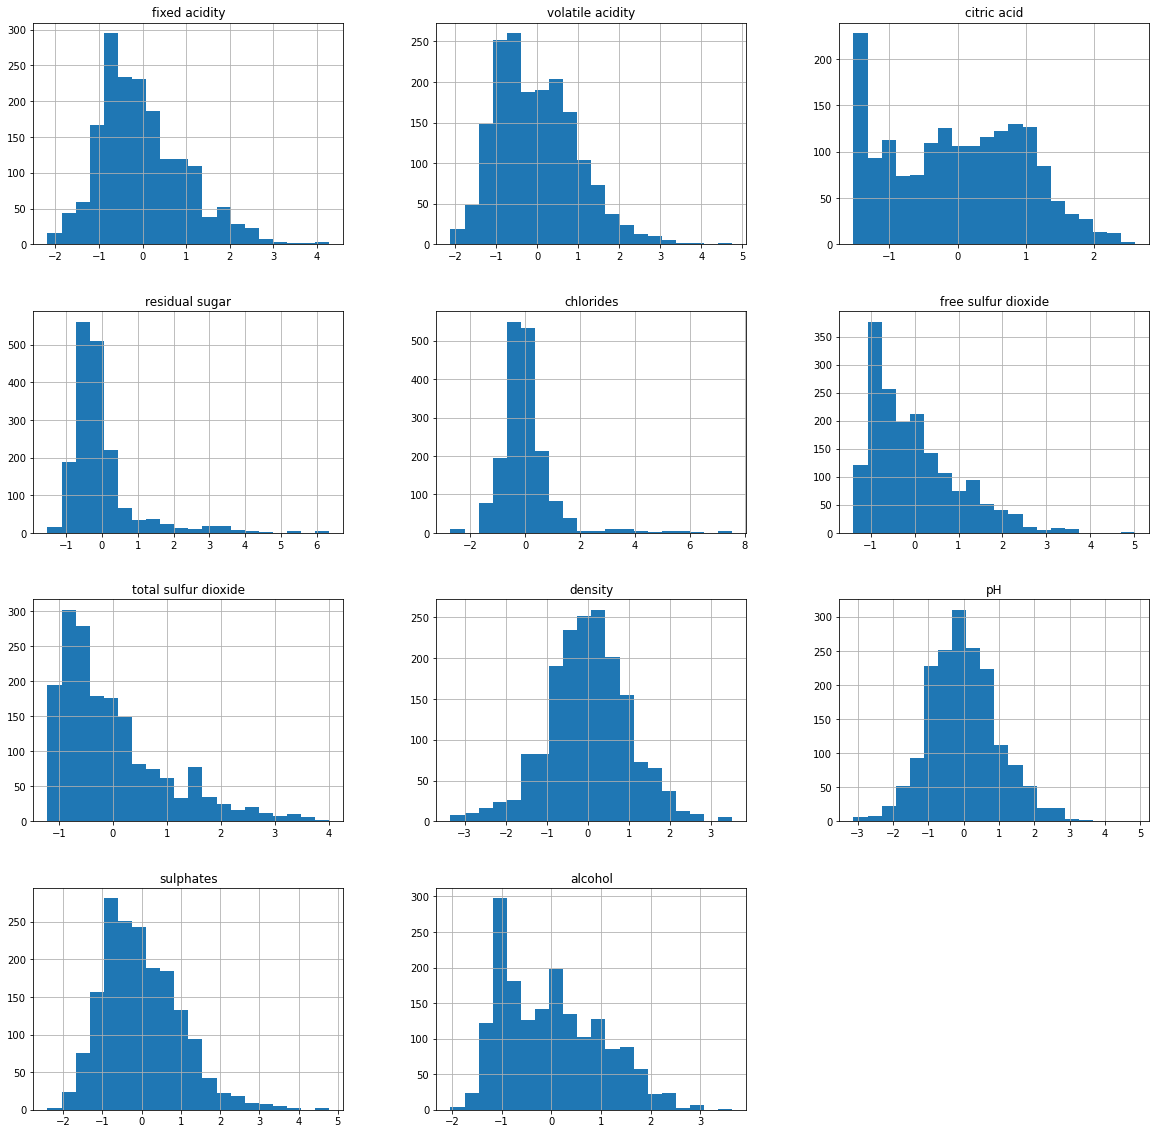

In [98]:
x_train_sm.hist(bins = 20, figsize = (20, 20))
plt.show()

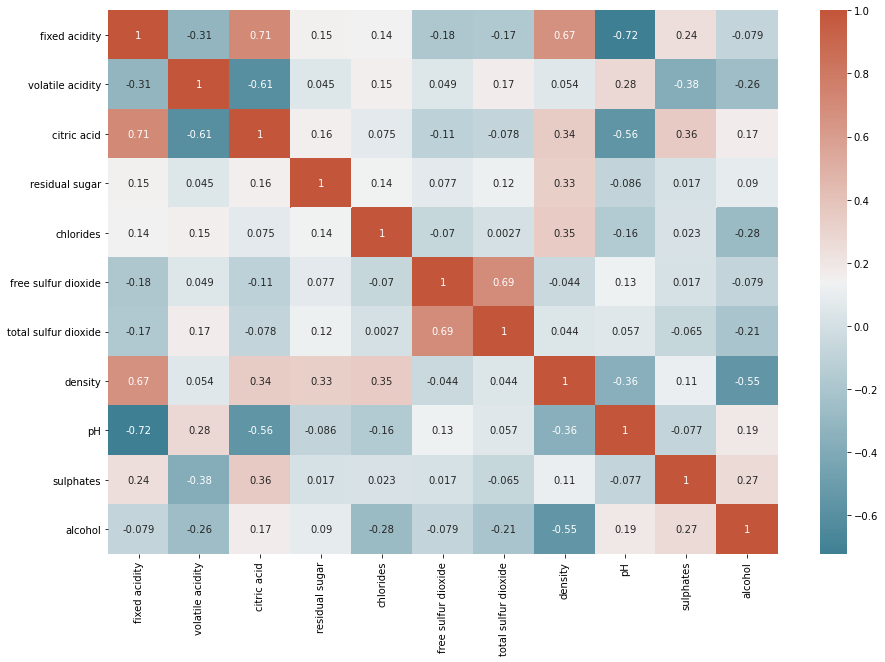

In [99]:
corr = x_train_sm.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, classification_report, confusion_matrix

logReg = LogisticRegression()
logReg.fit(x_train_sm, y_train_sm)
y_predict = logReg.predict(x_test)

print(accuracy_score(y_test, y_predict))

print(classification_report(y_true = y_test, y_pred = y_predict))

confusion_matrix(y_test, y_predict)

0.58125
              precision    recall  f1-score   support

        high       0.39      0.77      0.52        43
         low       0.75      0.67      0.71       149
         mid       0.51      0.41      0.46       128

    accuracy                           0.58       320
   macro avg       0.55      0.62      0.56       320
weighted avg       0.61      0.58      0.58       320



array([[ 33,   3,   7],
       [  6, 100,  43],
       [ 45,  30,  53]])

In [141]:
# OVR 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

lb = LabelBinarizer()
y_train_ovr = lb.fit_transform(y_train_sm)
y_test_ovr = lb.transform(y_test)

clf = OneVsRestClassifier(LogisticRegression(penalty='none'))
y_score = clf.fit(x_train_sm, y_train_ovr).predict_proba(x_test)

print(classification_report(y_true = y_test, y_pred = lb.inverse_transform(clf.predict(x_test))))


# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(3):
#     fpr[i], tpr[i], _ = roc_curve(y_test_ovr[:, i], y_score[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Plot of a ROC curve for a specific class
# for i in range(3):
#     plt.figure()
#     plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver operating characteristic example')
#     plt.legend(loc="lower right")
#     plt.show()

              precision    recall  f1-score   support

        high       0.21      0.95      0.34        42
         low       0.74      0.61      0.67       150
         mid       0.75      0.02      0.05       128

    accuracy                           0.42       320
   macro avg       0.57      0.53      0.35       320
weighted avg       0.67      0.42      0.38       320



In [101]:
y_predict_insample = logReg.predict(x_train_sm)

print(accuracy_score(y_train_sm, y_predict_insample))

print(classification_report(y_true = y_train_sm, y_pred = y_predict_insample))

confusion_matrix(y_train_sm, y_predict_insample)

0.6538681948424069
              precision    recall  f1-score   support

        high       0.71      0.79      0.75       588
         low       0.70      0.74      0.72       574
         mid       0.52      0.43      0.47       583

    accuracy                           0.65      1745
   macro avg       0.64      0.65      0.65      1745
weighted avg       0.64      0.65      0.65      1745



array([[466,  14, 108],
       [ 22, 423, 129],
       [164, 167, 252]])

In [179]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 600, max_depth = 5, min_samples_split=10, min_samples_leaf=5)
rfc.fit(x_train_sm, y_train_sm)
y_pred_rfc = rfc.predict(x_test)

print(accuracy_score(y_test, y_pred_rfc))

print(classification_report(y_true = y_test, y_pred = y_pred_rfc))

confusion_matrix(y_test, y_pred_rfc)

0.596875
              precision    recall  f1-score   support

        high       0.38      0.67      0.48        43
         low       0.74      0.72      0.73       149
         mid       0.55      0.42      0.48       128

    accuracy                           0.60       320
   macro avg       0.56      0.61      0.57       320
weighted avg       0.62      0.60      0.60       320



array([[ 29,   1,  13],
       [ 10, 108,  31],
       [ 38,  36,  54]])

In [176]:
y_pred_rfc_insample = rfc.predict(x_train_sm)

print(accuracy_score(y_train_sm, y_pred_rfc_insample))

print(classification_report(y_true = y_train_sm, y_pred = y_pred_rfc_insample))

confusion_matrix(y_train_sm, y_pred_rfc_insample)

0.7590361445783133
              precision    recall  f1-score   support

        high       0.79      0.88      0.84       592
         low       0.77      0.81      0.79       572
         mid       0.70      0.58      0.64       579

    accuracy                           0.76      1743
   macro avg       0.75      0.76      0.75      1743
weighted avg       0.75      0.76      0.75      1743



array([[523,   8,  61],
       [ 25, 462,  85],
       [111, 130, 338]])

AttributeError: type object 'RocCurveDisplay' has no attribute 'from_estimator'

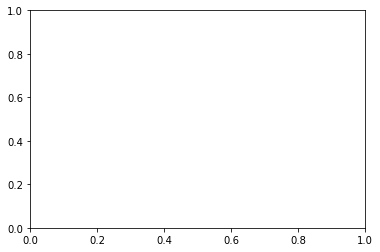

'0.23.2'